## Tweeter Bot detection 

Bots, trolls and fake accounts are quite problematic in this era of social media-dependent consciouness. They take part in creating hypes and spams, spread fake news, ultimately displaying non-genuine behavior in micro-blogging platforms. Genuine posts are valuable not only because that help us understand the human sentiments, but also becuase that increase diversity in the sphere.   

### Goal 
The goal of this project is to create a classifier that predicts if an account is a troll or a human. Using APIs, NLP and Machine Learning, I predict important features from which we detect a troll account and avoid spending time communicating with trolls. 

The outcome from this project could be used for marketers who target real users for selling their products. A curated list of real users will help them reach out to customers easily and attain business goals. 


### Data

The data comprises existing data from Kaggle [], data collected via Tweepy API from twitter between dates x/x/18 - x/x/18. 

### Project Workflow

#### Approach 1: 
We tried to build a classifier from existing user account data to predict bots. The model(s) achieved high accuracy, implicating model overfitting. Upon inspection of the datasets, we found we have small training and testing datasets with high sampling bias. Therefore, we needed to gather more data. 

#### Approach 2:
We gathered more data from Twitter. However, we found difficilty in getting  data that could be distinctively labeled for bots and non-bots. Precisely, many Twitter verified accounts that are claimed to be authentic have many bots or they are representative of an organization. The bot data that we gathered [from Website](www.) are small in number (xxx) and are suspended Russian bots. This makes the sample biased.  

#### Approach 3:
Becuse of this we decided to do a sentiment analysis on #TOPIC and identify bots from the tweets. 


### Analysis

Predicting bots from text is an NLP (Natural Languae Processing) problem.
I leveraged NLTK as my tokenizer and Sklearn tfidfVectorizer to perform my Bag of words Analysis and tfidf transformation. Word2Vec

For the final model I evaluated model complexity by accuarcy and speed. I eventually settled on _____
- Why? and limiting the max features in the SVD step to explain a lot of  __________________

-.

-.

-.


### Conclusions
- .

-.

-.

-.



## Approach 1: Bot detection from user account data 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.utils import resample

# Import sklearn models 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, accuracy_score

#nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Time 
import time as t

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Data 

df1 = pd.read_csv('/Users/pbiswas/Documents/NewDS/bootcamp/U3_capstone/Data/Train_data.csv', encoding='iso-8859-1')  # original data 
df2 = pd.read_csv('/Users/pbiswas/Documents/NewDS/bootcamp/U3_capstone/Data/Training_data.csv', encoding='iso-8859-1') # data scraped Twitter celebrities and bots

print(df1.shape, df2.shape)


(5029, 20) (2797, 20)


In [3]:
df2['listed_count'] = df2.listedcount
df2 = df2.drop('listedcount', axis=1)

In [4]:

# combining the two for the first attempt at the baseline models 
df = pd.concat([df1, df2], ignore_index=True, axis=0, sort=True)
print(df.shape)
df.head()

(7826, 20)


,bot,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,has_extended_profile,id,id_str,lang,listed_count,location,name,screen_name,status,statuses_count,url,verified
0,0,Thu Apr 23 20:15:49 +0000 2009,False,False,NEW AARON CARTER MUSIC DOWNLOAD LINK LV_ EP...,37437,571310,76070,True,34716038.0,34716038,en,4909,Sony Recording Artist,Aaron Carter,aaroncarter,"{u'contributors': None, u'truncated': False, u...",56077,NaN,True
1,0,Fri Mar 30 20:58:59 +0000 2007,False,False,"singer/songwriter, hopeless romantic, drinker ...",1248,292385,963,False,3013511.0,3013511,en,6076,NaN,Michelle Branch,michellebranch,"{u'contributors': None, u'truncated': False, u...",16688,https://t.co/2vSKw7cmzC,True
2,0,7/13/09 0:38,True,True,NaN,0,1,7,False,56237623.0,56237623,en,0,NaN,laurie lindeman,stronginmyfaith,"Status(contributors=None, truncated=False, tex...",3,NaN,False
3,0,Tue Mar 31 21:12:33 +0000 2009,False,False,"@TheVeronicas ___ Wanderer, worshiper, if you ...",143,222659,352,False,27964284.0,27964284,en,3261,5th Dimension,Jessica Veronica,Jessicaveronica,"{u'contributors': None, u'truncated': False, u...",10999,https://t.co/U6yNZoDZfu,True
4,0,4/13/12 17:37,False,False,meio ogra mas o cora_£o © de mocinha,13440,646,446,False,552876065.0,552876065,pt,2,brasil,rebosta,resargento,NaN,25292,NaN,False


In [5]:
df.columns

# description of all variables are found here
# https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object.html

Index(['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified'],
      dtype='object')

In [6]:
df_test = pd.read_csv('/Users/pbiswas/Documents/NewDS/bootcamp/U3_capstone/Data/Testing_Data.csv', 
                      encoding='iso-8859-1')  # 575 only, but without the bots annotated
print(df_test.shape, df_test.columns)

(575, 20) Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favorites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')


In [7]:
df_test.bot.value_counts() # the bot column for the test data has no values

Series([], Name: bot, dtype: int64)

## Exploratory Data Analysis

In [8]:
# EDA 

print(df.describe())  # 7826, 20 variables including 'bots'
print('\n each column type: \n', df.dtypes)


               bot  favourites_count  followers_count  friends_count  \
count  7826.000000       7826.000000     7.826000e+03   7.826000e+03   
mean      0.472527       2025.440710     9.886296e+05   4.464187e+03   
std       0.499277      16465.509016     5.478649e+06   5.163593e+04   
min       0.000000          0.000000     0.000000e+00   0.000000e+00   
25%       0.000000          0.000000     4.400000e+01   1.000000e+01   
50%       0.000000         25.000000     3.440000e+02   1.830000e+02   
75%       1.000000        480.000000     1.371400e+04   6.670000e+02   
max       1.000000     714021.000000     9.632156e+07   2.056668e+06   

                 id   listed_count  statuses_count  
count  7.826000e+03    7826.000000    7.826000e+03  
mean   1.489314e+17    3139.969461    1.956812e+04  
std    3.106093e+17   16088.849227    1.580204e+05  
min    3.526000e+03       0.000000    0.000000e+00  
25%    6.964567e+07       1.000000    1.660000e+02  
50%    1.917182e+09      17.00000

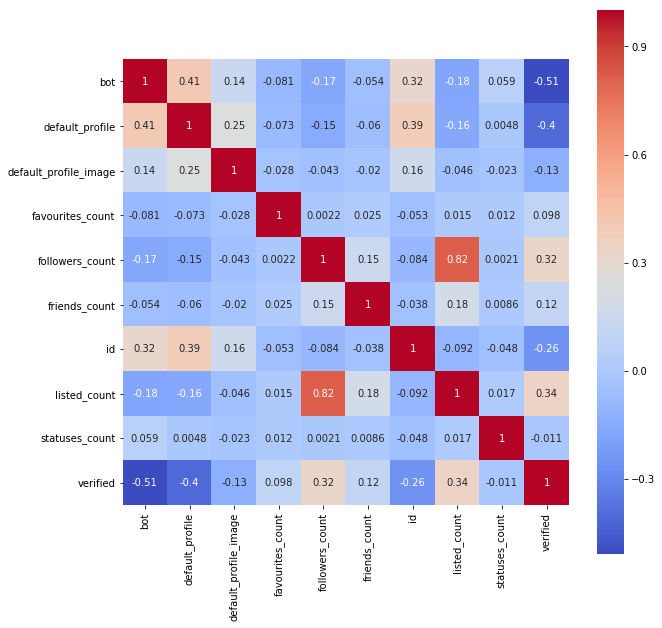

In [9]:
# Correlation Matrix

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, square=True)


__Predictor-predictor correlations:__

- 'followers_count' is highly correlated with 'listed_count'(i.e., how many public lists does the user belong to), and has overall similar values for the rest of the correlations  --> delete one of them, probably 'listed_count'
- 'id' is slightly correlated with 'default_profile' implicating that most users do not have their given twitter theme or background. 
- 'verified' is slightly positively correlated with 'followers_count', and that is becuase most celebrity profiles are verified and are also likely to have more followers. 

__Response-predictor correlations:__
- 'bot' is negatively with 'verified', implying if a profile is not verified there's more chance of being a bot.
- 'bot' is positively correlated with 'default_profile'; not many people/bots change the default profile.  


In [10]:
df.columns

Index(['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified'],
      dtype='object')

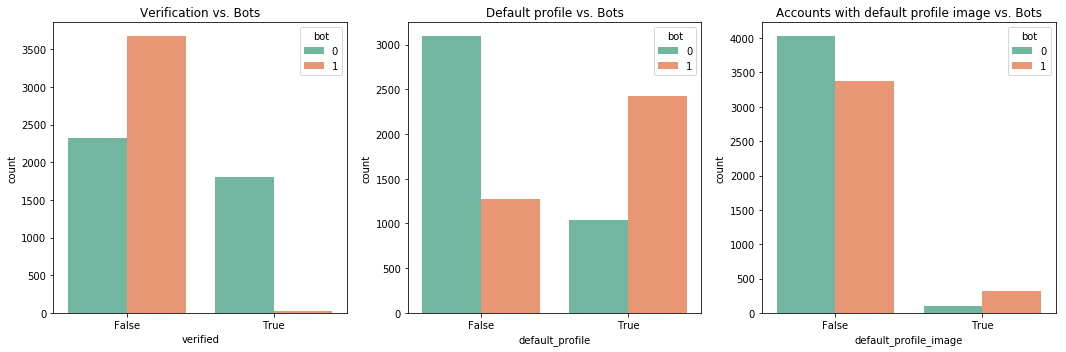

In [11]:
## Checking the insights from the correlation matrix in the following plots 

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(data=df, x='verified', hue='bot', palette='Set2')
plt.yticks()
plt.title('Verification vs. Bots')

plt.subplot(1,3,2)
sns.countplot(data=df, x='default_profile', hue='bot', palette='Set2')
plt.yticks()
plt.title('Default profile vs. Bots')

plt.subplot(1,3,3)
sns.countplot(data=df, x='default_profile_image', hue='bot',  palette='Set2')
plt.yticks()
plt.title('Accounts with default profile image vs. Bots')
plt.tight_layout()
plt.show()

- Almost all bots are not verified. 
- Bots tend to keep the default profile.
- Bots and non-bots alike change their default profile picture. 


In [12]:
# creating a subset of all count-related data
count_data = df[['favourites_count', 'followers_count', 'friends_count','statuses_count', 'bot']]

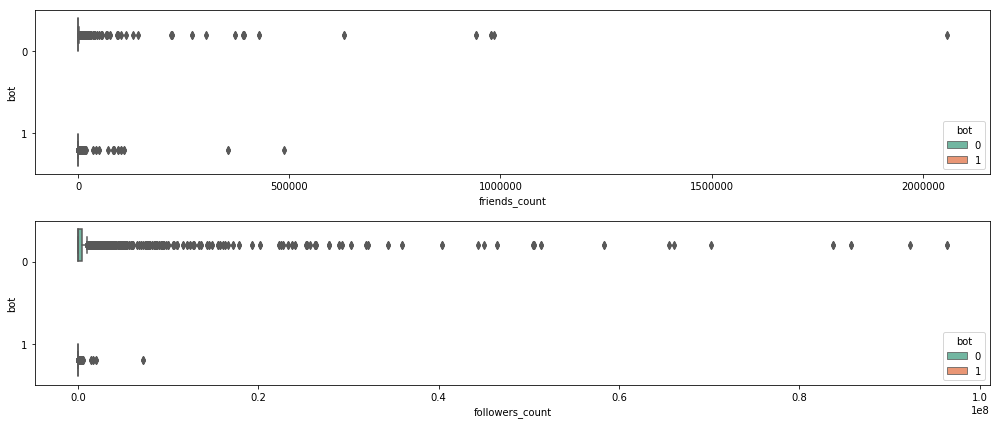

In [13]:
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
sns.boxplot(data=count_data, y='bot', x='friends_count', hue='bot', palette='Set2', orient='h')

plt.subplot(2,1,2)
sns.boxplot(data=count_data, y='bot', x='followers_count', hue='bot', palette='Set2', orient='h')
plt.tight_layout()

- Real users tend to have many more followers and friends than bots. 

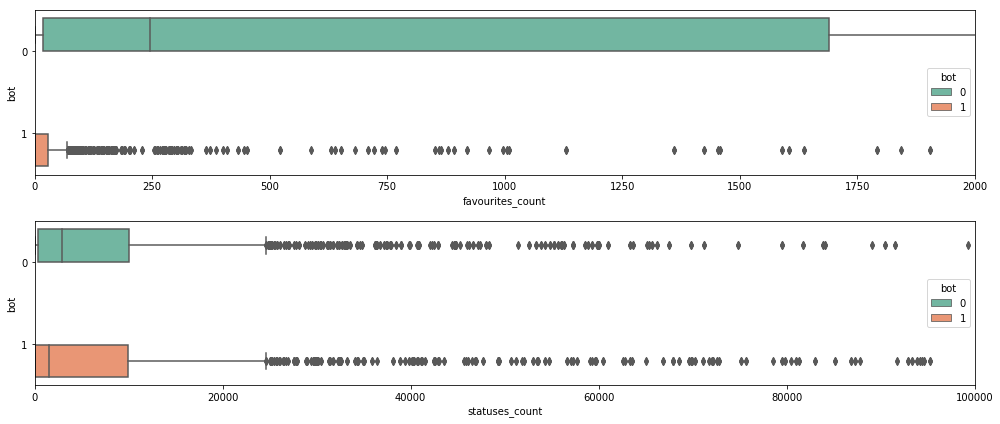

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
sns.boxplot(data=count_data, y='bot', x='favourites_count', hue='bot', palette='Set2', orient='h')
plt.xlim(0,2000)

plt.subplot(2,1,2)
sns.boxplot(data=count_data, y='bot', x='statuses_count', hue='bot', palette='Set2', orient='h')
plt.xlim(0,100000)
plt.tight_layout()

- Bots and real users have almost same amount of status updates. Bots copy real users in terms of how many status update they post. 
- On the other hand, from the 'favourites_count' we see that real users 'likes' other's posts more than the bots. Bots are more self-promoting than showing social behaviors. 



In [15]:
#sns.pairplot(count_data, vars=['statuses_count', 'favourites_count'], hue="bot", palette="Set2",height=4, aspect=1.4)
#plt.xlim((-100, 400000))
#plt.show()

In [16]:
#df.groupby(df.screen_name.str.contains('bot')).bot.value_counts()
#
#df[df.bot==1].screen_name.str.contains('bot').value_counts()
#df[df.bot==0].screen_name.str.contains('bot').value_counts()

In [17]:
#plt.figure(figsize=(12,4))

#plt.subplot(1,2,1)
#sns.barplot(data=df, x='bot', y=df[df.bot==1].screen_name.str.contains('bot').count())

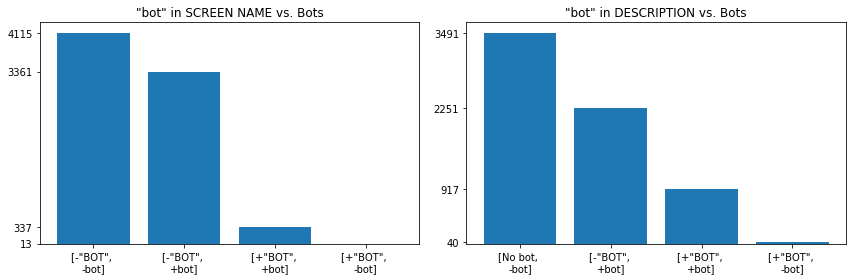

In [18]:
# Checking if bots declare themselves as bots in the description column. 

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
vals = df.groupby(df.screen_name.str.contains('bot')).bot.value_counts()
#df[df.bot==1].screen_name.str.contains('bot').value_counts()
ys = vals.values
labels = ['[-"BOT", \n-bot]', '[-"BOT", \n+bot]','[+"BOT", \n+bot]','[+"BOT", \n-bot]' ]
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
#sns.barplot(xs,ys)
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('"bot" in SCREEN NAME vs. Bots')

plt.subplot(1,2,2)

vals = df.groupby(df.description.str.contains('bot')).bot.value_counts()
#df[df.bot==1].screen_name.str.contains('bot').value_counts()
ys = vals.values
labels = ['[No bot, \n-bot]', '[-"BOT", \n+bot]','[+"BOT", \n+bot]','[+"BOT", \n-bot]' ]
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
#sns.barplot(xs,ys)
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('"bot" in DESCRIPTION vs. Bots')
plt.tight_layout()

In [19]:
df = df.applymap(lambda x: int(1) if x == True else x)
df = df.applymap(lambda x: int(0) if x == False else x)

df_test = df_test.applymap(lambda x: 1 if x == True else x)
df_test = df_test.applymap(lambda x: 0 if x == False else x)


In [20]:
cols_to_drop = ['id', 'id_str', 'screen_name', 'location', 'description', 'url', 
                         'listed_count', 'created_at', 'verified', 'lang', 'status', 'has_extended_profile',
                         'name', 'bot']


In [21]:
X_train = df.drop(cols_to_drop, axis=1)
X_test = df_test.drop(cols_to_drop, axis=1)


y_train = df.bot
y_test = df_test.bot

In [22]:
y_train.value_counts()

0    4128
1    3698
Name: bot, dtype: int64

In [23]:
val_data = pd.read_csv('/Users/pbiswas/Documents/NewDS/bootcamp/U3_capstone/Data/Test_data.csv', 
                       encoding='iso-8859-1', index_col='Unnamed: 0') # only 100 datapoints 

val_data.bot.value_counts()

1    51
0    50
Name: bot, dtype: int64

In [24]:
X_val = val_data.drop(cols_to_drop, axis=1)
y_val = val_data.bot

In [25]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)


In [26]:
print(X_val.columns)

Index(['followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'default_profile', 'default_profile_image'],
      dtype='object')


In [27]:

# Run a bunch of baseline models on the training data

# make separate python files for the helper functions and import them in the main notebook - good practice 


def baseline_models(clf, X_train, y_train, X_val, y_val):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = t.time()
    clf.fit(X_train, y_train)
    train_time = t.time() - t0
    print("train time: %0.3fs" % train_time)

    print("Crossvalidating: ")
    t0 = t.time()
    cv_score = cross_val_score(clf, X_train, y_train, cv=5)
    train_time = t.time() - t0
    print("Crossvalidated accuracy: %0.3f with std %0.3f" % (cv_score.mean(), cv_score.std()))
    
    #Metrics
    t0 = t.time()
    pred = clf.predict(X_val)
    test_time = t.time() - t0
    print("test time:  %0.3fs" % test_time)
    
    #score = accuracy_score(y_test, pred)
    #print("accuracy:   %0.3f" % score)
    

    print('confusion matrix \n', confusion_matrix(y_val, pred))  
    precision = precision_score(y_val, pred)
    print('Test precision score %.3f ' % precision)
    recall = recall_score(y_val, pred)
    print('Test recall score %.3f ' % recall)
    rocauc = roc_auc_score(y_val, pred)
    print('ROC AUC score %.3f' % rocauc)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, cv_score.mean(), train_time, test_time, precision, recall, rocauc


results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf, X_train, y_train, X_val, y_val))



BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.012s
Crossvalidating: 
Crossvalidated accuracy: 0.733 with std 0.004
test time:  0.002s
confusion matrix 
 [[ 0 50]
 [ 0 51]]
Test precision score 0.505 
Test recall score 1.000 
ROC AUC score 0.500

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.035s
Crossvalidating: 
Crossvalidated accuracy: 0.738 with std 0.015
test time:  0.001s
confusion matrix 
 [[37 13]
 [51  0]]
Test precision score 0.000 
Test recall score 0.000 
ROC AUC score 0.370

GBC
___________________________

In [28]:
display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])

row_index = 0
for clf in results:
    display_scores.loc[row_index, 'Classifier'] = clf[0]
    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
    display_scores.loc[row_index, 'Precision score'] = clf[4]
    display_scores.loc[row_index, 'Recall score'] = clf[5]
    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
    row_index +=1

In [29]:
display_scores

,Classifier,Mean CV accuracy,Precision score,Recall score,ROC-AUC score
0,BernoulliNB,0.733324,0.50495,1,0.5
1,LogisticRegression,0.738053,0,0,0.37
2,GradientBoostingClassifier,0.911322,0.333333,0.490196,0.245098
3,KNeighborsClassifier,0.876949,0.333333,0.156863,0.418431
4,RandomForestClassifier,0.998722,0.319444,0.45098,0.23549
5,SVC,0.997828,1,0.0196078,0.509804


Text(0.5,1,'Mean Crossvalidated accuracy for models')

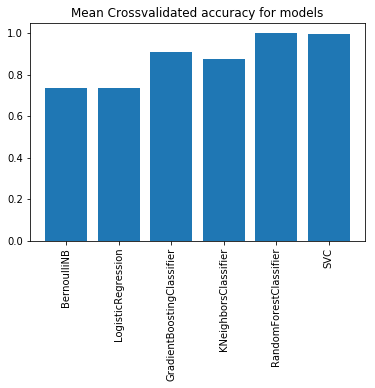

In [30]:
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')


Cross-validated accuracies from Random Forest classifier and the Support Vector Classifiers are extremely high, implying that the models are overfitting. This could be due to (1) very small amount of validation data (n=101) and overall small training dataset (n=7826). In the next iteration we are creating a custom training and testing dataset to increase the testing sample volume and check if accuracy decreases. 

In [31]:
[print(l,f) for l,f in zip(X_train.columns, rfc.feature_importances_)]

default_profile 0.06829863675077558
default_profile_image 0.007148812519275596
favourites_count 0.19331610606377542
followers_count 0.26880446352958115
friends_count 0.30282417498253245
statuses_count 0.15960780615405976


[None, None, None, None, None, None]

We see that the 'friends_count' and the 'followers_count' are the most important features for from the Random Forest Classifier. 'default_profile_image' has very low importance value, hence we drop it in the next iteration of models. 

In [32]:
cols_to_use = ['followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'default_profile']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[cols_to_use], df.bot, test_size= .3)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape  )

(5478, 5) (2348, 5) (5478,) (2348,)


In [35]:

#############
results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()


for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf, X_train, y_train, X_test, y_test))


BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.007s
Crossvalidating: 
Crossvalidated accuracy: 0.751 with std 0.017
test time:  0.001s
confusion matrix 
 [[865 391]
 [205 887]]
Test precision score 0.694 
Test recall score 0.812 
ROC AUC score 0.750

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.016s
Crossvalidating: 
Crossvalidated accuracy: 0.744 with std 0.014
test time:  0.001s
confusion matrix 
 [[859 397]
 [204 888]]
Test precision score 0.691 
Test recall score 0.813 
ROC AUC score 0.749

GBC
___________________

In [36]:
display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])

row_index = 0
for clf in results:
    display_scores.loc[row_index, 'Classifier'] = clf[0]
    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
    display_scores.loc[row_index, 'Precision score'] = clf[4]
    display_scores.loc[row_index, 'Recall score'] = clf[5]
    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
    row_index +=1
display_scores

,Classifier,Mean CV accuracy,Precision score,Recall score,ROC-AUC score
0,BernoulliNB,0.751362,0.694053,0.812271,0.750483
1,LogisticRegression,0.743518,0.691051,0.813187,0.748552
2,GradientBoostingClassifier,0.905442,0.926254,0.862637,0.901462
3,KNeighborsClassifier,0.855056,0.855179,0.854396,0.8643
4,RandomForestClassifier,0.972251,0.993513,0.981685,0.988056
5,SVC,0.899049,0.993789,0.879121,0.937172


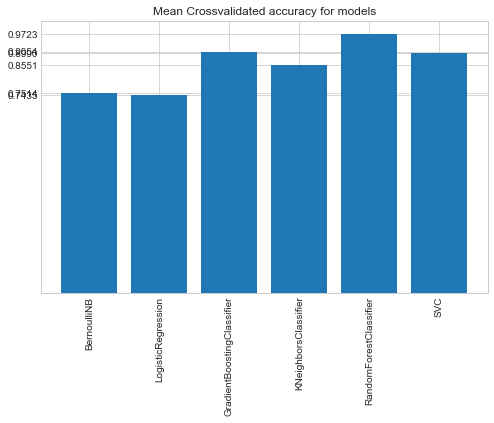

In [37]:
import matplotlib.style as style #style.available
style.use( 'seaborn-whitegrid')

plt.figure(figsize=(8,5))
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')
plt.show()

In [38]:
# print a table of all the metrics in comparison

Overall accuracy of all the models decreases with more data in the testing set and indicates that we need more data for a better classifier. Although, overall accuracy of all models decreases a little, other metrics (ROC AUC score, precision and recall score) show increase and this is due to the increase in the test data set. 

Our next step is to gather more data from Twitter to increase dataset volume. We gathered data from Twitter verified accounts and Russian bots. 

__Dataset description:__

*'v_users.csv'* contains 2607 new data from twitter verified accounts. We gathered user account details from 2607 Twitter verified user accounts using Tweeepy. We tagged this presumably as non-bots as during the Oct.-Nov. 2018, Twitter verified email ids of celebrities and renowned organizations for verifying their accounts. This is a biased sample. Twitter verifies accounts for celebrities. Some of these account holders have a large list of followers and friends, while it is expected that most real-life non-celebrities do not have such a large number of followers and friends ('followings'). Upon inspection, we found that the verified users list also contain renowned organizations (e.g., the Rolling Stone) and public figures (e.g., Barack Obama, Rihanna) and promotional websits from newspapers (e.g., RedLineCBS). Nonetheless, we want to see how our models perform in this data. 


*'russ_bots.csv'* contains 349 account information from suspended Russian accounts. Data found [here](https://www.nbcnews.com/tech/social-media/now-available-more-200-000-deleted-russian-troll-tweets-n844731).

This dataset has 392 bots, but 14 rows. Upon gathering the data we realized that this dataset is biased too. Due to the agendas and characteristics of the Russian bots, this dataset is primarily biased towards Russian. 



We are concatenating both datasets to our existing training data for the next set of models. 

In [39]:
v_users = pd.read_csv('Data/v_users.csv', encoding='utf-8')  # 2607


In [40]:
# Matching orders with the original dataset
v_users = v_users[['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified']]

In [41]:
# Checking if the df_nonbot and the train columns are the same and in the same order 
#for i,users in enumerate(df.columns):
#    if v_users.columns[i] == df.columns[i]:
#        print(i, 'Yes')

In [42]:
russ_bots = pd.read_csv('Data/russ_bots.csv', encoding='utf-8') #392 russ bots

# matching column order in the original set
russ_bots = russ_bots[['bot', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'has_extended_profile', 'id', 'id_str', 'lang', 'listed_count',
       'location', 'name', 'screen_name', 'status', 'statuses_count', 'url',
       'verified']]

In [43]:
print('New n on bots:',len(russ_bots), '; new n on nonbots', len(v_users),'; total: ', len(russ_bots)+len(v_users))
print('original dataset n:',len(df), '; new appended dataset n: ', len(df)+len(russ_bots)+ len(v_users))

New n on bots: 392 ; new n on nonbots 2607 ; total:  2999
original dataset n: 7826 ; new appended dataset n:  10825


In [44]:
# Creating new training data from collected data

df_new = df.append([v_users, russ_bots], ignore_index=True)
print(len(df_new))

10825


In [45]:
df_new.bot.value_counts()

0    6735
1    4090
Name: bot, dtype: int64

In [46]:
print(cols_to_use)

['followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'default_profile']


In [47]:
df_new[cols_to_use].isna().sum()

followers_count     9
friends_count       9
favourites_count    9
statuses_count      9
default_profile     0
dtype: int64

In [48]:
df_new[cols_to_use] = df_new[cols_to_use].fillna(0)

In [49]:
df_new[cols_to_use].isna().sum()

followers_count     0
friends_count       0
favourites_count    0
statuses_count      0
default_profile     0
dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_new[cols_to_use], df_new.bot, test_size= .33)

#print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(7252, 5) (3573, 5) (7252,) (3573,)


In [51]:
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

In [52]:
X_train.head()

,followers_count,friends_count,favourites_count,statuses_count,default_profile
2726,712.0,623.0,1423.0,38905.0,0
4038,31289.0,167.0,1002.0,980.0,0
2325,31.0,23.0,2.0,170.0,1
10615,1907.0,1567.0,972.0,2537.0,0
1541,1226.0,2636.0,25.0,664.0,0


In [53]:
results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf, X_train, y_train, X_test, y_test))

    


BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.009s
Crossvalidating: 
Crossvalidated accuracy: 0.742 with std 0.018
test time:  0.003s
confusion matrix 
 [[1945  263]
 [ 683  682]]
Test precision score 0.722 
Test recall score 0.500 
ROC AUC score 0.690

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.026s
Crossvalidating: 
Crossvalidated accuracy: 0.768 with std 0.010
test time:  0.002s
confusion matrix 
 [[1804  404]
 [ 455  910]]
Test precision score 0.693 
Test recall score 0.667 
ROC AUC score 0.742

GBC
___________

In [54]:
# Display scores 
display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])

row_index = 0
for clf in results:
    display_scores.loc[row_index, 'Classifier'] = clf[0]
    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
    display_scores.loc[row_index, 'Precision score'] = clf[4]
    display_scores.loc[row_index, 'Recall score'] = clf[5]
    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
    row_index +=1

display_scores
    


,Classifier,Mean CV accuracy,Precision score,Recall score,ROC-AUC score
0,BernoulliNB,0.741592,0.721693,0.499634,0.690261
1,LogisticRegression,0.76779,0.692542,0.666667,0.741848
2,GradientBoostingClassifier,0.883758,0.877014,0.757509,0.845919
3,KNeighborsClassifier,0.857968,0.821835,0.794139,0.843854
4,RandomForestClassifier,0.95753,0.974635,0.928938,0.956996
5,SVC,0.883066,0.997121,0.761172,0.879907


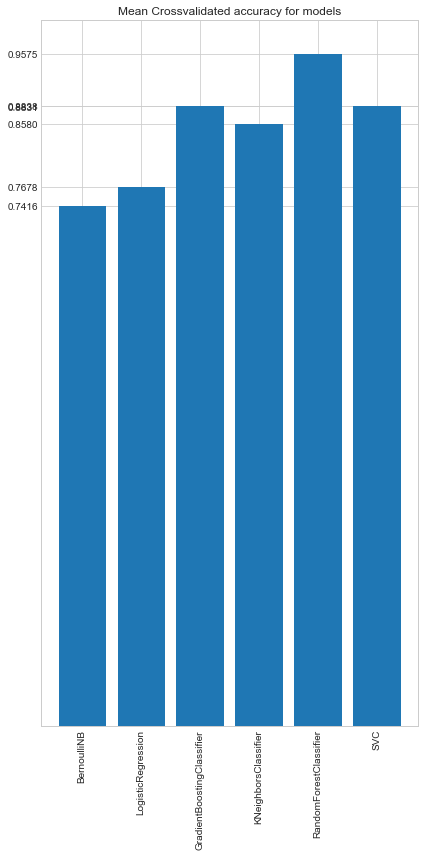

In [55]:
import matplotlib.style as style #style.available
style.use( 'seaborn-whitegrid')

plt.figure(figsize=(6,12))
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')
plt.tight_layout()

In [56]:
[print(ftr, imp) for ftr, imp in zip(X_train.columns, rfc.feature_importances_)]

followers_count 0.3045027857877269
friends_count 0.2881079511695555
favourites_count 0.16875081377651846
statuses_count 0.20840912692629407
default_profile 0.030229322339905083


[None, None, None, None, None]

Random forest still outperforms other classifiers (5-fold cross-validated accuracy 95%). 

Most important features, in order of important scores from Random Forest classifier model are - followers count, friends count, favorites_count, statuses_count

We also see that with more data the models' accuracies decrease, which means that we need more data for training the models. However, the dataset we have is biased in many aspects:

- Most of the users data are from celebrities who tend to have a large number of followers and friends. 
- More than 10% of our bots profile is from Russian Bots, hence the classifier might have learned anything related to Russia to classify as bots. 
- 9% of our dataset is not English. We are not sure how the models are learning from foreign languages. 

In [57]:
#russ_bots.shape, #df.bot.value_counts()
#df_new.lang.value_counts()
#(9076-(7772+275+175))/9076

In [58]:
# Basic NLP approach

#Bag of words from the description 
# unigrams and bigrams 
# dataset too small for word2Vec

In [59]:
#sns.distplot(df_new[df_new.bot==0].friends_count, bins=5)
#sns.distplot(df_new[df_new.bot==1].followers_count, bins=5)

In [60]:
## Pulling in more real users and fake users data 

# Real data accumilated from Twitter on 11/02 - 7655 
# Script in Twitter_data_collection-Copy1.ipynb

new_real = pd.read_csv('Data/users_ivoted.csv')

In [61]:
print(new_real.shape, '\n data description', new_real.describe(), '\n data types: \n', new_real.dtypes)

(7655, 20) 
 data description           bot  favourites_count  followers_count  friends_count            id  \
count  7655.0       7655.000000     7.655000e+03    7655.000000  7.655000e+03   
mean      0.0      34295.682691     8.444897e+03    3341.467668  2.386745e+17   
std       0.0      59276.119407     6.933092e+04    9452.482154  3.938292e+17   
min       0.0          0.000000     0.000000e+00       0.000000  1.117000e+03   
25%       0.0       1872.000000     2.340000e+02     338.000000  1.136459e+08   
50%       0.0      10860.000000     8.490000e+02     918.000000  8.965984e+08   
75%       0.0      40118.500000     3.236000e+03    3343.500000  7.408505e+17   
max       0.0     809288.000000     2.474602e+06  329481.000000  1.058178e+18   

             id_str  listed_count  statuses_count  
count  7.655000e+03   7655.000000    7.655000e+03  
mean   2.386745e+17     89.854344    4.248079e+04  
std    3.938292e+17    437.831484    8.097626e+04  
min    1.117000e+03      0.00000

In [62]:
# new fake from website # 845
new_fake = pd.read_csv('Data/fake_users_.csv')

In [63]:

print(new_fake.shape, '\n data description', new_fake.describe(), '\n data types: \n', new_fake.dtypes)

(845, 20) 
 data description          bot  default_profile  default_profile_image  favourites_count  \
count  845.0       845.000000             845.000000        845.000000   
mean     1.0         0.631953               0.002367          5.250888   
std      0.0         0.482560               0.048622         38.119244   
min      1.0         0.000000               0.000000          0.000000   
25%      1.0         0.000000               0.000000          0.000000   
50%      1.0         1.000000               0.000000          0.000000   
75%      1.0         1.000000               0.000000          1.000000   
max      1.0         1.000000               1.000000        765.000000   

       followers_count  friends_count  has_extended_profile            id  \
count       845.000000     845.000000                   0.0  8.450000e+02   
mean         29.576331     555.267456                   NaN  2.557320e+08   
std         106.446337     202.794843                   NaN  1.910443e+08

In [64]:
# more fake users #3351
fake_users_2 = pd.read_csv('Data/fake_users_2.csv')
fake_users_2.shape

(3351, 20)

In [65]:
df_new_more = df_new.append([new_real, new_fake, fake_users_2], ignore_index=True)

In [66]:
df_new_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 20 columns):
bot                      22676 non-null int64
created_at               22667 non-null object
default_profile          22676 non-null int64
default_profile_image    22676 non-null int64
description              20746 non-null object
favourites_count         22676 non-null float64
followers_count          22676 non-null float64
friends_count            22676 non-null float64
has_extended_profile     18204 non-null object
id                       22676 non-null float64
id_str                   18480 non-null object
lang                     22667 non-null object
listed_count             22667 non-null float64
location                 17382 non-null object
name                     22667 non-null object
screen_name              22676 non-null object
status                   17589 non-null object
statuses_count           22676 non-null float64
url                      18456 non-null ob

In [67]:
df_new_more.bot.value_counts()

0    14390
1     8286
Name: bot, dtype: int64

In [68]:
df_new_more[cols_to_use].isna().sum()

followers_count     0
friends_count       0
favourites_count    0
statuses_count      0
default_profile     0
dtype: int64

In [69]:
print(cols_to_use)

X_train, X_test, y_train, y_test = train_test_split(df_new_more[cols_to_use], df_new_more.bot, test_size= .33)



['followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'default_profile']


In [70]:
#print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

X_train.head()

(15192, 5) (7484, 5) (15192,) (7484,)


,followers_count,friends_count,favourites_count,statuses_count,default_profile
18644,6.0,565.0,0.0,3.0,1
13827,88.0,282.0,2998.0,2974.0,1
10660,612.0,507.0,2326.0,1717.0,0
14095,595.0,519.0,89095.0,220395.0,1
11370,42.0,186.0,20762.0,391.0,0


In [71]:


results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf, X_train, y_train, X_test, y_test))



BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.015s
Crossvalidating: 
Crossvalidated accuracy: 0.848 with std 0.005
test time:  0.002s
confusion matrix 
 [[4468  261]
 [ 886 1869]]
Test precision score 0.877 
Test recall score 0.678 
ROC AUC score 0.812

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.115s
Crossvalidating: 
Crossvalidated accuracy: 0.879 with std 0.003
test time:  0.004s
confusion matrix 
 [[4461  268]
 [ 627 2128]]
Test precision score 0.888 
Test recall score 0.772 
ROC AUC score 0.858

GBC
___________

In [72]:

display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])

row_index = 0
for clf in results:
    display_scores.loc[row_index, 'Classifier'] = clf[0]
    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
    display_scores.loc[row_index, 'Precision score'] = clf[4]
    display_scores.loc[row_index, 'Recall score'] = clf[5]
    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
    row_index +=1
display_scores

,Classifier,Mean CV accuracy,Precision score,Recall score,ROC-AUC score
0,BernoulliNB,0.847946,0.877465,0.678403,0.811606
1,LogisticRegression,0.87895,0.888147,0.772414,0.857871
2,GradientBoostingClassifier,0.931608,0.930161,0.879855,0.920684
3,KNeighborsClassifier,0.910216,0.900076,0.863158,0.903666
4,RandomForestClassifier,0.969457,0.98142,0.958621,0.974024
5,SVC,0.863351,0.99503,0.726679,0.862282


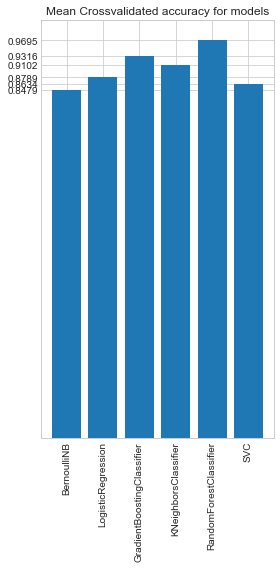

In [73]:
import matplotlib.style as style #style.available
style.use( 'seaborn-whitegrid')

plt.figure(figsize=(4,8))
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')
plt.tight_layout()

In [74]:
[print(ftr, imp) for ftr, imp in zip(X_train.columns, rfc.feature_importances_)]

followers_count 0.29538233268937936
friends_count 0.19215839238634835
favourites_count 0.32349070983738043
statuses_count 0.1758481686593495
default_profile 0.013120396427542393


[None, None, None, None, None]

In [75]:
# Last model run after getting data from https://botometer.iuni.iu.edu/bot-repository/datasets.html

Suggestions: 
- pull in more data. 

- pull in the users verified accoutns and then run - choose a hastag to run a query on and add that to the data. 
 
#### how to get a general population from twitter.
- try to build a bot detector, built a model and accuracy high.= problem with datasets - explain what's going on 
- find a better dataset - what to get ? more data
- explain what problems you faced - how tried to solve.

### altervaties: 
- find more real people and what might happen - accuracy plummets bcz less fatures, 
- what can you do? to build a model and if it;s possible to get a model from than 
current problems - overfitting "Russia" --> bots  --> biased datasets -- how to explain what kind of biases -- next what kind of biases in the classifiers we get. 


- or find a hashtag and see who is a bot or not:
    - get 10 tweets from each person. and use NLP for finding the bots 
    - Or, tweets with hashtag topic and so sentiment analysis 
    - get more data/larger datasets for sentiment analysis - more NLP focused 




# Clustering 

Clustering the important variables to see how the data is sampled. (11/03/2018 meeting )

Clustering is an unsupervised learning technique to see how the data is distributed. In the clusters below, we tried mean-shift clustering that aims to discover blobs of samples that has a similar density. It follows a centroid-based algorithm that keeps on updating the candidates values to a mean of the given region until the model converges. 

In [76]:
# From the models above we are selecting only the top important features. 

#X_train.columns
cluster_cols = ['followers_count', 'friends_count', 'favourites_count',
       'statuses_count']

In [77]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs


In [78]:
# Converting the values to log scale 
X_train_log = pd.DataFrame(columns=cluster_cols)

# 0 values are converted to inf in log scale, so changing them to -1
X_train_log = X_train[cluster_cols].applymap(lambda x: np.log10(x) if x >= 1 else -1)

In [79]:
X_train_log.head()

,followers_count,friends_count,favourites_count,statuses_count
18644,0.778151,2.752048,-1.000000,0.477121
13827,1.944483,2.450249,3.476832,3.473341
10660,2.786751,2.705008,3.366610,3.234770
14095,2.774517,2.715167,4.949853,5.343202
11370,1.623249,2.269513,4.317269,2.592177


In [80]:
# fitting y_train to X_train_log
X_train_log['bot'] = y_train

In [81]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using


bandwidth = estimate_bandwidth(X_train_log[cluster_cols], quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
X_train_log[cluster_cols] 

ms.fit(X_train_log[cluster_cols])
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)



number of estimated clusters : 3


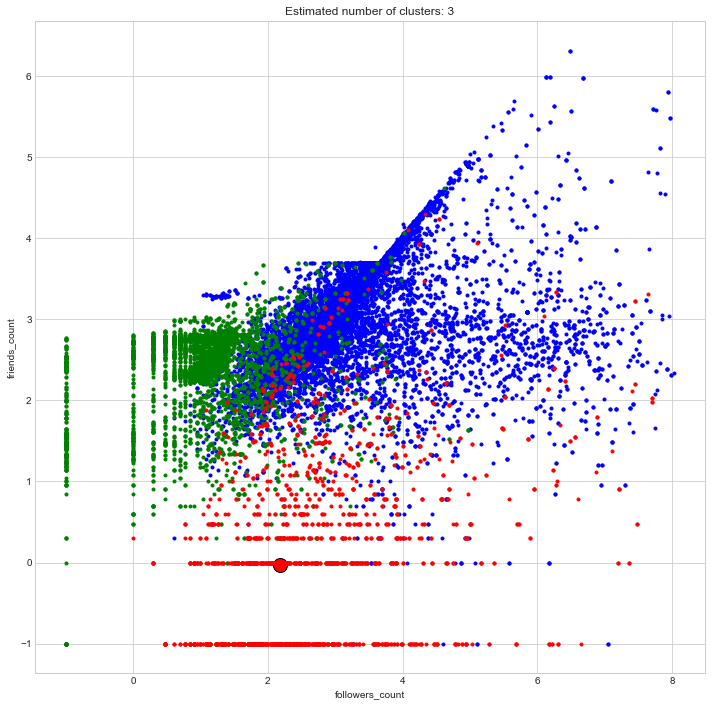

In [87]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(12,12))
plt.clf()

feature1 = 0
feature2 = 1
feature3 = 2
feature4 = 3
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    plt.plot(X_train_log[cluster_cols].values[my_members, feature1], X_train_log[cluster_cols].values[my_members, feature2], col + '.')
    plt.xlabel(cluster_cols[feature1])
    plt.ylabel(cluster_cols[feature2])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [88]:
# In the following we attempt to see pairwise comparison of different features. 

In [89]:
# creating index for passing on to the plots to show the following plots for each feature. 

members_bot_ind = y_train[y_train == True].index.values # index to array 
members_nonbot_ind = y_train[y_train == False].index.values

In [90]:
members_nonbot_ind

array([13827, 14095, 11370, ..., 13730,  9719,   650])

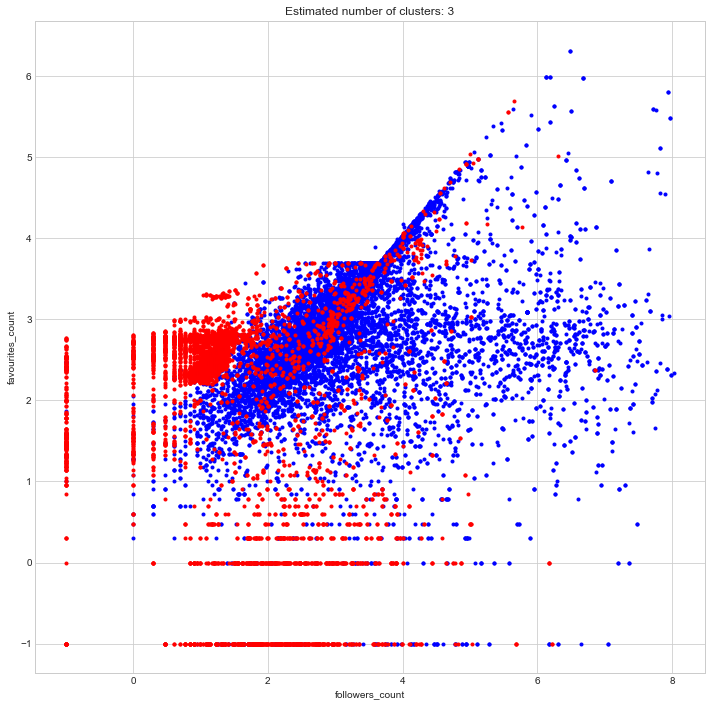

In [91]:
plt.figure(figsize=(12,12))
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[feature1]].values, X_train_log[X_train_log.bot==False][cluster_cols[feature2]].values, 'b.')
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[feature1]].values, X_train_log[X_train_log.bot==True][cluster_cols[feature2]].values,  'r.')
plt.xlabel(cluster_cols[feature1])
plt.ylabel(cluster_cols[feature3])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#X_train_log[X_train_log.bot==True][cluster_cols[feature1]].values

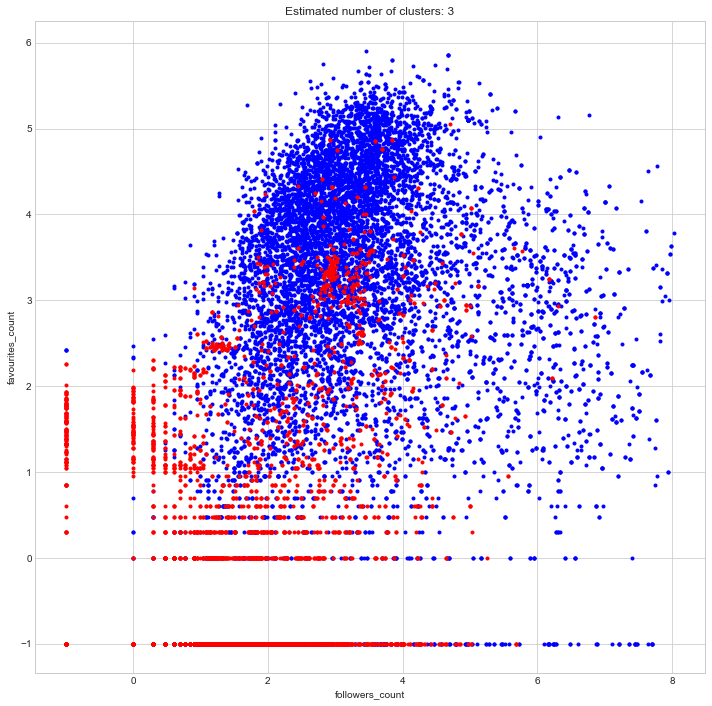

In [92]:
plt.figure(figsize=(12,12))
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[feature1]].values, X_train_log[X_train_log.bot==False][cluster_cols[feature3]].values, 'b.')
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[feature1]].values, X_train_log[X_train_log.bot==True][cluster_cols[feature3]].values,  'r.')
plt.xlabel(cluster_cols[feature1])
plt.ylabel(cluster_cols[feature3])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

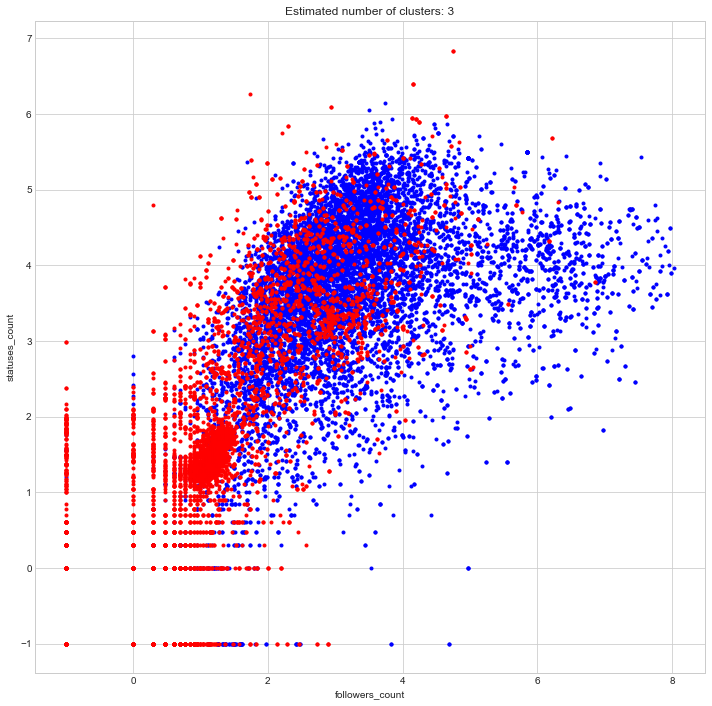

In [93]:
plt.figure(figsize=(12,12))
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[feature1]].values, X_train_log[X_train_log.bot==False][cluster_cols[feature4]].values, 'b.')
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[feature1]].values, X_train_log[X_train_log.bot==True][cluster_cols[feature4]].values,  'r.')
plt.xlabel(cluster_cols[feature1])
plt.ylabel(cluster_cols[feature4])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

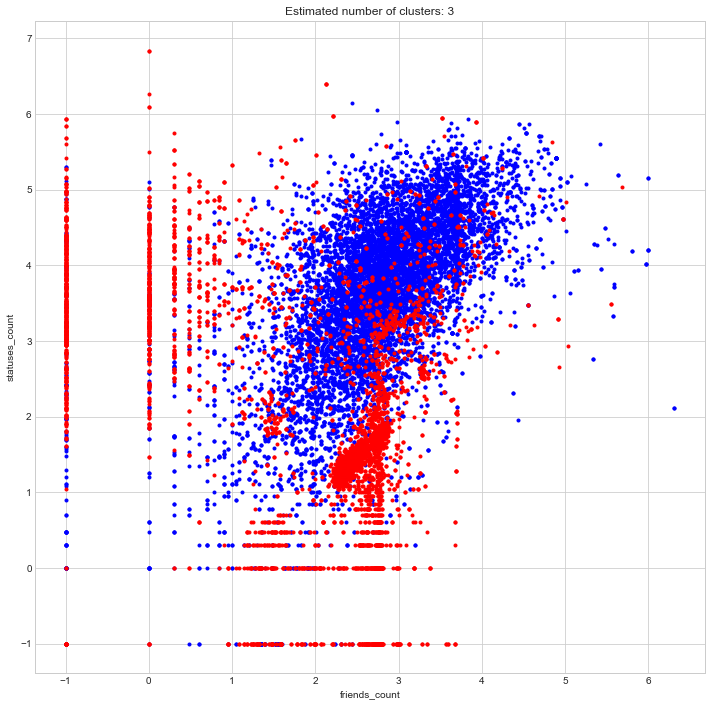

In [94]:
plt.figure(figsize=(12,12))
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[feature2]].values, X_train_log[X_train_log.bot==False][cluster_cols[feature4]].values, 'b.')
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[feature2]].values, X_train_log[X_train_log.bot==True][cluster_cols[feature4]].values,  'r.')
plt.xlabel(cluster_cols[feature2])
plt.ylabel(cluster_cols[feature4])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

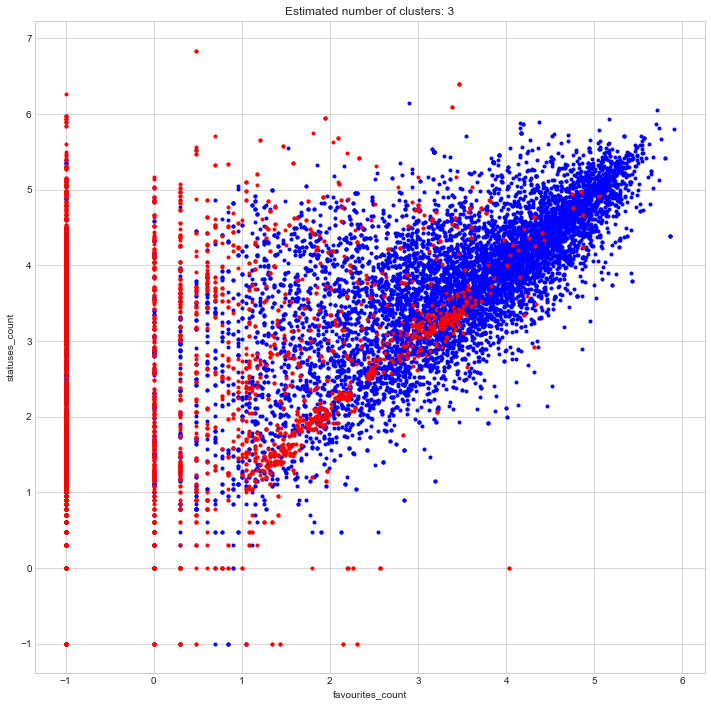

In [95]:
plt.figure(figsize=(12,12))
plt.plot(X_train_log[X_train_log.bot==False][cluster_cols[feature3]].values, X_train_log[X_train_log.bot==False][cluster_cols[feature4]].values, 'b.')
plt.plot(X_train_log[X_train_log.bot==True][cluster_cols[feature3]].values, X_train_log[X_train_log.bot==True][cluster_cols[feature4]].values,  'r.')
plt.xlabel(cluster_cols[feature3])
plt.ylabel(cluster_cols[feature4])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

<Figure size 576x576 with 0 Axes>

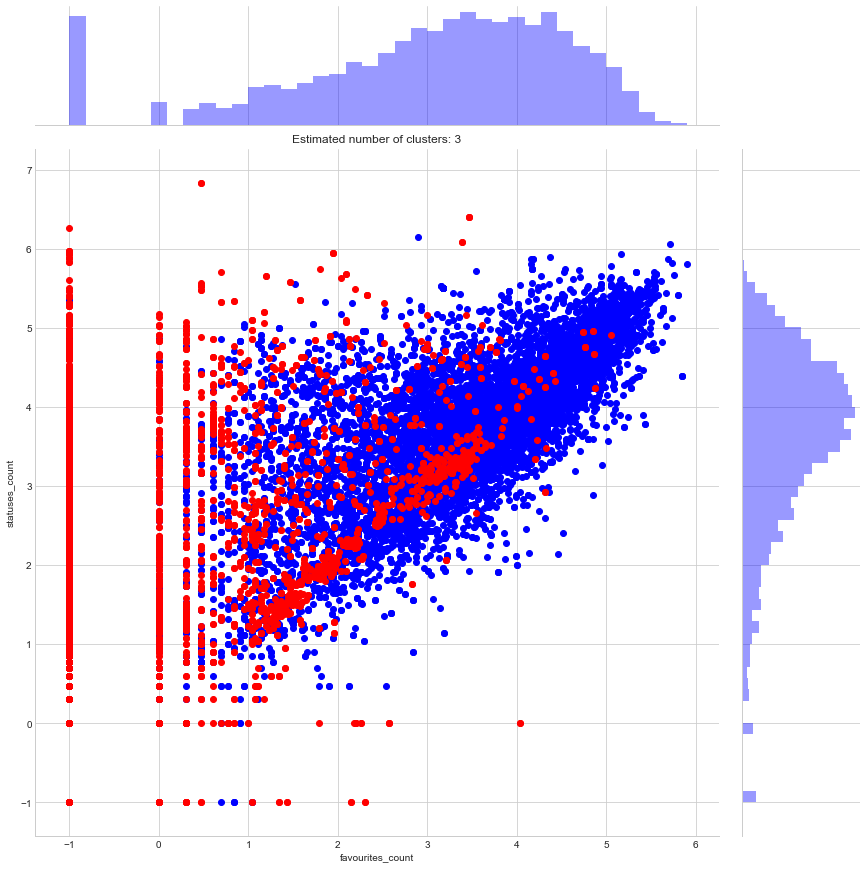

In [117]:
plt.figure(figsize=(8,8))
graph = sns.jointplot(x=X_train_log[X_train_log.bot==False][cluster_cols[feature3]].values, 
                  y=X_train_log[X_train_log.bot==False][cluster_cols[feature4]].values, color='b', height=12)

graph.x = X_train_log[X_train_log.bot==True][cluster_cols[feature3]].values
graph.y = X_train_log[X_train_log.bot==True][cluster_cols[feature4]].values
graph.plot_joint(plt.scatter,  c='r')
plt.xlabel(cluster_cols[feature3])
plt.ylabel(cluster_cols[feature4])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
from IPython.display import Image


![ch](/Users/pbiswas/Desktop/ch.png)

PATH = "/Users/pbiswas/Desktop/ch.png"
Image(filename = PATH , width=500, height=500)

### to do next - 

 - try creating the histograms for each of the plots above to show how much overlap and the overall distribution of each class. 
- use the log features for the inputs, probably not required for RFC, 
- try all the classifiers with the log features and ses if that imporives the accuracy/metrics of the other classifiers. 
- bring more data - https://botometer.iuni.iu.edu/bot-repository/datasets.html
- try more feature engineering - log, and get some more features may be from the paper
- try gettin more tweets from the bots and the real users - try sentitment analysis - give each person a score overall on how positive and negative feature. 

- write up what you did so far - this is the baseline - 
- 100 % accuracy > more data > how the data is biased > use the cluster plots to show how they are biased - 
- now bring in some fresh data from the other reposi https://botometer.iuni.iu.edu/bot-repository/datasets.html
- feature engineering and see how incorporate NLP and how sentiment analysis to score [positivity/negativity ] for the last 10 tweets. 
- 

In [ ]:
# Using log features for the classifiers. 

In [ ]:
X_train_log.head()

In [120]:
# Converting the values to log scale 
X_test_log = pd.DataFrame(columns=cluster_cols)

# 0 values are converted to inf in log scale, so changing them to -1
X_test_log = X_test[cluster_cols].applymap(lambda x: np.log10(x) if x >= 1 else -1)

X_test_log.head()



,followers_count,friends_count,favourites_count,statuses_count
3207,-1.000000,1.447158,-1.000000,-1.000000
17780,3.779813,3.721233,5.213194,5.163245
13843,2.901458,2.950365,3.232234,3.888909
6258,3.461799,0.301030,1.176091,5.055886
20428,0.954243,2.352183,-1.000000,1.322219


In [121]:
# fitting y_train to X_train_log
X_test_log['bot'] = y_test
X_test_log.head()

,followers_count,friends_count,favourites_count,statuses_count,bot
3207,-1.000000,1.447158,-1.000000,-1.000000,1
17780,3.779813,3.721233,5.213194,5.163245,0
13843,2.901458,2.950365,3.232234,3.888909,0
6258,3.461799,0.301030,1.176091,5.055886,1
20428,0.954243,2.352183,-1.000000,1.322219,1


In [122]:
X_train = X_train_log.drop('bot', axis=1)
y_train = X_train_log.bot
X_test = X_test_log.drop('bot', axis=1)
y_test = X_test_log.bot

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15192, 4) (15192,) (7484, 4) (7484,)


In [123]:
results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
#rfc = RandomForestClassifier(n_estimators=100)
#svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
#        (rfc, "Random forest"),
#        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf, X_train, y_train, X_test, y_test))



BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.016s
Crossvalidating: 
Crossvalidated accuracy: 0.867 with std 0.005
test time:  0.002s
confusion matrix 
 [[4396  333]
 [ 647 2108]]
Test precision score 0.864 
Test recall score 0.765 
ROC AUC score 0.847

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.037s
Crossvalidating: 
Crossvalidated accuracy: 0.891 with std 0.003
test time:  0.002s
confusion matrix 
 [[4365  364]
 [ 444 2311]]
Test precision score 0.864 
Test recall score 0.839 
ROC AUC score 0.881

GBC
___________

In [124]:

display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])

row_index = 0
for clf in results:
    display_scores.loc[row_index, 'Classifier'] = clf[0]
    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
    display_scores.loc[row_index, 'Precision score'] = clf[4]
    display_scores.loc[row_index, 'Recall score'] = clf[5]
    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
    row_index +=1
display_scores



,Classifier,Mean CV accuracy,Precision score,Recall score,ROC-AUC score
0,BernoulliNB,0.867364,0.86358,0.765154,0.847369
1,LogisticRegression,0.890864,0.863925,0.838838,0.880933
2,GradientBoostingClassifier,0.931477,0.931312,0.880944,0.921546
3,KNeighborsClassifier,0.934504,0.943558,0.879855,0.924596


Changing to log values increases the classifier performances. The ROC-AUC score improves. 

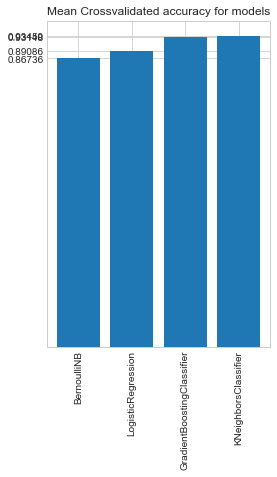

In [126]:
import matplotlib.style as style #style.available
style.use( 'seaborn-whitegrid')

plt.figure(figsize=(4,6))
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')
plt.show()

In [169]:
# Getting more data 
all_hums = pd.read_csv('Data/all_hums.csv', encoding='utf-8')
all_bots = pd.read_csv('Data/all_bots.csv', encoding='utf-8')

In [174]:
all_hums.shape, all_bots.shape

((24700, 20), (10049, 20))

In [175]:
all_df = df_new_more.append([all_bots, all_hums], ignore_index=True)

In [176]:
all_df.shape


(57425, 20)

In [177]:
all_df.bot.value_counts()

0    39090
1    18335
Name: bot, dtype: int64

In [178]:
all_df = all_df.fillna(0)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(all_df[cols_to_use], all_df.bot, test_size= .3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape  )

(40197, 5) (17228, 5) (40197,) (17228,)


In [210]:



#############
results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()


for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf, X_train, y_train, X_test, y_test))


BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.019s
Crossvalidating: 
Crossvalidated accuracy: 0.913 with std 0.002
test time:  0.004s
confusion matrix 
 [[11508   274]
 [ 1145  4301]]
Test precision score 0.940 
Test recall score 0.790 
ROC AUC score 0.883

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.265s
Crossvalidating: 
Crossvalidated accuracy: 0.692 with std 0.011
test time:  0.001s
confusion matrix 
 [[7100 4682]
 [ 666 4780]]
Test precision score 0.505 
Test recall score 0.878 
ROC AUC score 0.740

GBC
_______

In [181]:

display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])

row_index = 0
for clf in results:
    display_scores.loc[row_index, 'Classifier'] = clf[0]
    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
    display_scores.loc[row_index, 'Precision score'] = clf[4]
    display_scores.loc[row_index, 'Recall score'] = clf[5]
    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
    row_index +=1
display_scores



,Classifier,Mean CV accuracy,Precision score,Recall score,ROC-AUC score
0,BernoulliNB,0.883124,0.934934,0.7821,0.878373
1,LogisticRegression,0.670871,0.489813,0.878174,0.726035
2,GradientBoostingClassifier,0.95639,0.941787,0.927854,0.950569
3,KNeighborsClassifier,0.933453,0.916793,0.88347,0.923059
4,RandomForestClassifier,0.980397,0.982381,0.967489,0.979703
5,SVC,0.887504,0.99349,0.696804,0.847338


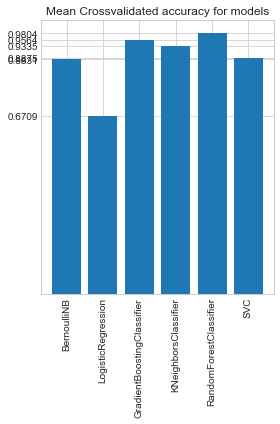

In [182]:
import matplotlib.style as style #style.available
style.use( 'seaborn-whitegrid')

plt.figure(figsize=(4,6))
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')
plt.tight_layout()

In [211]:
# And just in case to see how the models are performing only in the new dataset

#df_trial = pd.concat([all_bots, all_hums], axis=0, ignore_index=True)
#
#df_trial = df_trial.fillna(0)
#
#X_train, X_test, y_train, y_test = train_test_split(df_trial[cols_to_use], df_trial.bot, test_size= .3)
#X_train.shape, X_test.shape
#
#results = []
#
#bnb = BernoulliNB()
#logReg = LogisticRegression()
#gbc = GradientBoostingClassifier()
#knn = KNeighborsClassifier(n_neighbors=10)
#rfc = RandomForestClassifier(n_estimators=100)
#svc = SVC()
#
#
#for clf, name in (
#        (bnb, "BNB Classifier"),
#        (logReg, "LogReg"),
#        (gbc, "GBC"),
#        (knn, "kNN"),
#        (rfc, "Random forest"),
#        (svc, "SVC")
#):
#    print('=' * 80)
#    print(name)
#    results.append(baseline_models(clf, X_train, y_train, X_test, y_test))
#
#display_scores = pd.DataFrame(columns=['Classifier', 'Mean CV accuracy', 'Precision score', 'Recall score', 'ROC-AUC score'])
#
#row_index = 0
#for clf in results:
#    display_scores.loc[row_index, 'Classifier'] = clf[0]
#    display_scores.loc[row_index, 'Mean CV accuracy'] = clf[1]
#    display_scores.loc[row_index, 'Precision score'] = clf[4]
#    display_scores.loc[row_index, 'Recall score'] = clf[5]
#    display_scores.loc[row_index, 'ROC-AUC score'] = clf[6]
#    row_index +=1
#display_scores
#

In [213]:
[print(l, v) for l, v in zip(X_train.columns, rfc.feature_importances_)]

followers_count 0.22174717622035875
friends_count 0.13941487298580935
favourites_count 0.23415815192211661
statuses_count 0.37905312695524473
default_profile 0.025626671916470726


[None, None, None, None, None]

## Summary of baseline 

To train our system we initially used a publicly available dataset consisting of 7k bot and non-bot accounts in total. Later we collected data; employed Twitter scraping and incorporated data from various publicly available resources. This procedure yielded a dataset of 57.4k with 39k nonbot and 18k bot accounts. 

We benchmarked our system using several off-the-shelf algorithms provided in the scikit-learn library (Pedregosa et. al. 2011). We measured the models' accuracy by measuring the Area Under the Receiver Operating Curve (ROC-AUC) with 5-fold cross validation. We compared Bernoulli Naive Bayes, Logistic Regression, Gradient Boosting Classifier, K-nearest neighbors, Random Forest Classifier and Support Vector Classifier. The best classification performance of 98.76 was obtained by the Random Forest Algorithm. The Random Forest model was trained with 100 estimators and the GIni coefficient to measure the quality of splits.

For the rest of the project I am going to focus on the latest verified dataset from [this resource](https://botometer.iuni.iu.edu/bot-repository/datasets.html) as the data we collected had sampling bias. Another advantage of choosing the following dataset is that we can access the tweets provided with these datasets. 

In the following I take a subset of certified bot and non-bot accounts, create features and try to improve the model accuracy. This dataset has almost 39k datapoints with 36% certified bots. 

In [201]:
# Creating certified humans and non-human dataset 
cert_hum = all_hums
cert_fake = pd.concat([all_bots, fake_users_2, new_fake], axis=0, ignore_index=True)

In [202]:
cert_hum.shape, cert_fake.shape

((24700, 20), (14245, 20))

In [273]:
df_cert = pd.concat([cert_hum, cert_fake], axis=0, ignore_index=True)

df_cert.shape

(38945, 20)

In [274]:
df_cert.bot.value_counts()

0    24700
1    14245
Name: bot, dtype: int64

In [275]:
df_cert.isna().sum()

bot                          0
created_at                   0
default_profile          30220
default_profile_image    34654
description              24536
favourites_count         19276
followers_count              0
friends_count                0
has_extended_profile     38945
id                           0
id_str                   38945
lang                     20276
listed_count             19276
location                 26097
name                     19277
screen_name              19276
status                   38945
statuses_count           19276
url                      30544
verified                 38934
dtype: int64

### Features 

__Existing features__: So far we have trained our models on the numerical features. And the most imporeant features are 'statuses_count' and 'favourites_count', followed by 'followers_count' and 'friends_count'. In the following I create new features, based on the meta-data provided with the user accounts. However, the main difficulty in creating these features is that a large percentage of the values are missing in these features. 

__Intended Features from meta-data__:

- Length of screen names 
- Length of description 
- calculate the ratio of (# of friends/2 * # of followers). It has been claimed that spambots have a high ratio value (i.e., lower ratio values mean legitimate users). [here](https://arxiv.org/pdf/1509.04098.pdf)

__Intended Features from tweets__:
- The content of spambots’ tweets exhibits the so-called message similarity. The score is higher for bots. 
- Sentiment features 


In [276]:
# There are several null values or blanks 
print(df_cert.screen_name.isna().sum(),
df_cert.description.isna().sum())

#Filling blanks with 0 

df_cert.screen_name = df_cert.screen_name.fillna(0)
df_cert.description = df_cert.description.fillna(0)

19276 24536


In [278]:
# Features from meta-data

# Length of screen name 
df_cert.screen_name = df_cert.screen_name.astype('str')
df_cert['len_screen_name'] = df_cert.screen_name.apply(lambda x: len(x))

In [279]:
# all null values are converted to 1 . # 19k 1 length 

df_cert.len_screen_name.value_counts()

1     19276
15     3128
12     2994
13     2590
14     2460
11     2457
10     2023
9      1693
8      1130
7       748
6       332
5       102
4        10
3         2
Name: len_screen_name, dtype: int64

In [280]:
# Length of description a
df_cert.description = df_cert.description.astype('str')  # null values will be converted to 1 in the next step
df_cert['len_desc'] = df_cert.description.apply(lambda x: len(x))

In [282]:
#df_cert.len_desc.value_counts()

In [238]:
 
df.screen_name.apply(lambda x: len(x))
type(df.screen_name)

pandas.core.series.Series

In [ ]:
# ratio of (# of friends/2 * # of followers)  # thankfully no null values 

df_cert['friend_2xfollower_ratio'] = df_



In [ ]:
df_cert.friends_count/df_cert.fo